## 3 Market Stylized Facts

### 3.3 Normal Returns as the Benchmark Case 
### geometric Brownian motion of BSM given by SDE  
$ds_t = r S_tdt + \sigma S_tdz_t$
### A discrete version, which can easily be simulated, is given by the difference equation  
$S_t = S_{t - \delta t}e^{(r - \frac{1}{2}\sigma ^2)\delta t + \sigma \sqrt{\delta tz_t}}$

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib as mpl
import math

In [125]:
###GBM simulation
def simulateGBM(S0,T,r,sigma):
    #S0 = 100 ##initial index level
    #T = 10 ##Time horizon
    #r = 0.05 ##Risk free rate
    #sigma = 0.2 ##Instantaneous volatility
    
    ##simulation parameters
    np.random.seed(250000)
    dateGBM = pd.DatetimeIndex(start = "05-13-2009",
                              end = "05-13-2019",
                              freq = "B")
    M = len(dateGBM) ##time steps
    dt = 1/252
    df = math.exp(-r * dt)
    
    ##stock price path
    ##random numbers
    rand = np.random.standard_normal((M,1))
    ##store St in S(array)
    S = np.zeros_like(rand)
    S[0] = S0
    for i in range(1,M):
        S[i] = S[i - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * rand[i] * math.sqrt(dt))
        
    gbm = pd.DataFrame(S[:,0],index = dateGBM, columns = ["price"])
    gbm["return"] = np.log(gbm["price"]/gbm["price"].shift(1))
    
    gbm["variance"] = 252 * np.cumsum(gbm["return"] ** 2) / np.arange(len(gbm))
    gbm["volatility"] = np.sqrt(gbm["variance"])
    gbm = gbm.dropna()
    return gbm

In [126]:
simulateGBM(100,10,0.05,0.2)

,price,return,variance,volatility
2009-05-14,98.904295,-0.011018,0.030589,0.174898
2009-05-15,98.444867,-0.004656,0.018026,0.134261
2009-05-18,97.696364,-0.007632,0.016911,0.130041
2009-05-19,98.280594,0.005962,0.014922,0.122158
2009-05-20,99.242342,0.009738,0.016718,0.129296
2009-05-21,95.211518,-0.041464,0.086140,0.293496
2009-05-22,95.773001,0.005880,0.075079,0.274005
2009-05-25,96.212119,0.004575,0.066353,0.257591
2009-05-26,94.369996,-0.019332,0.069445,0.263524
2009-05-27,92.849583,-0.016242,0.069149,0.262961


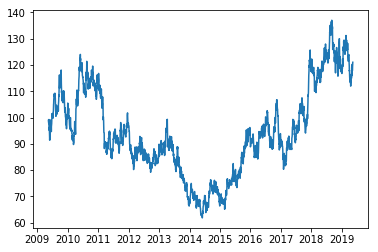

In [119]:
plt.plot(simulateGBM(100,10,0.05,0.2).price)